<a href="https://colab.research.google.com/github/Lefteris97/Fuzzy-Logic-System-for-CVD-Prediction/blob/main/HeartDeceaseDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart Decease Data Analysis for Fuzzy Logic System**
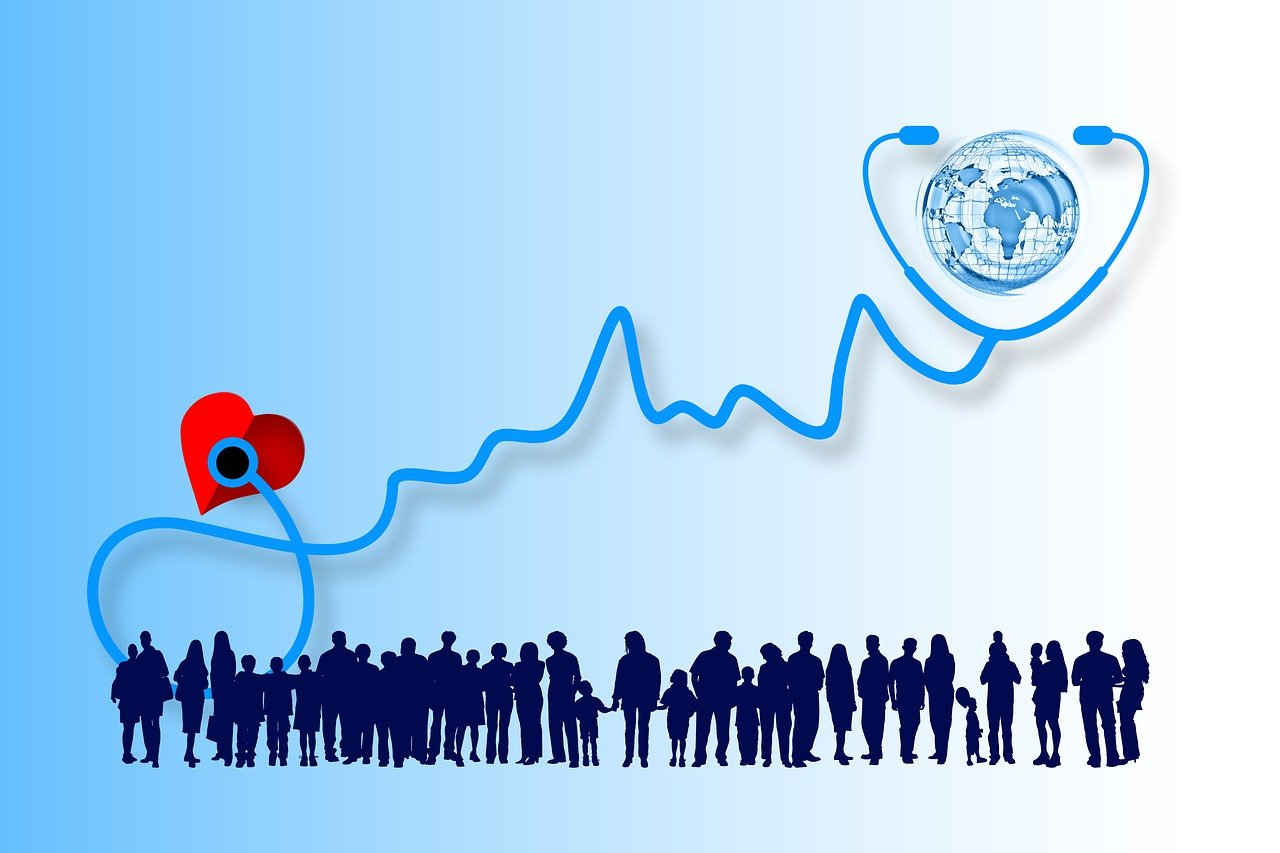
*   Lefteris Dimitriou
*   MPSP2308

## **Imports**

In [ ]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from google.colab import drive
from scipy import stats
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.naive_bayes import GaussianNB

## **Mount Drive / Import Data**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
heart_df = pd.read_csv('/content/drive/MyDrive/HeartDeceaseData/diabetes_binary_health_indicators_BRFSS2015.csv')

## **Exploratory Data Analysis (EDA)**

###**Summary Statistics**

In [ ]:
# Shape of df
heart_df.shape

(253680, 22)

In [ ]:
# First rows
heart_df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [ ]:
# Last rows
heart_df.tail(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253671,0.0,1.0,1.0,1.0,23.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0
253672,0.0,1.0,0.0,1.0,30.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0,1.0
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [ ]:
# Columns of df
heart_df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
# Df Summary
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Descriptive Statistics
heart_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


**Missing Values**

In [ ]:
heart_df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

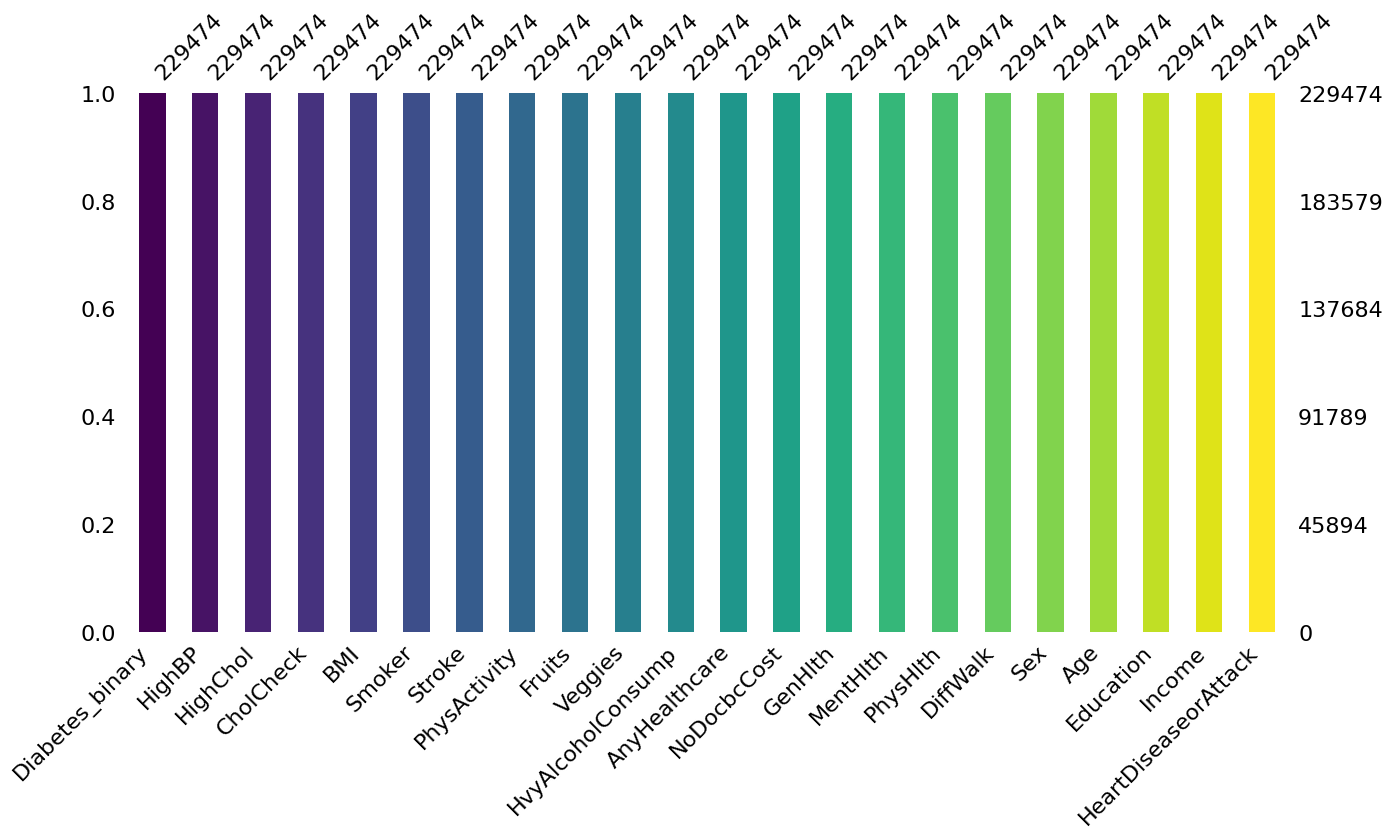

In [ ]:
num_columns = len(heart_df.columns)
colors = plt.cm.viridis(np.linspace(0, 1, num_columns))

fig, ax = plt.subplots(figsize=(15, 7))  # Adjust the size as needed
msno.bar(heart_df, color=colors, ax=ax)
plt.show()

> No missing values found

**Check for duplicate rows**

In [ ]:
duplicates = heart_df[heart_df.duplicated()]
print("Duplicated entries:")
duplicates

Duplicated entries:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [ ]:
# Remove duplicate rows
heart_df.drop_duplicates(inplace=True)

# Reset indexes
# heart_df.reset_index(drop=True, inplace=True)

# Print the shape of the dataframe after removing duplicate rows
print("Shape of dataframe after removing duplicate rows:", heart_df.shape)

Shape of dataframe after removing duplicate rows: (229474, 22)


**Arange columns for better visualizations**

In [ ]:
# Move target column to the last position
new_columns = [col for col in heart_df.columns if col != 'HeartDiseaseorAttack'] + ['HeartDiseaseorAttack']
heart_df = heart_df[new_columns]

In [ ]:
heart_df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'HeartDiseaseorAttack'],
      dtype='object')

###**Data Visualization**

**Correlation between columns**

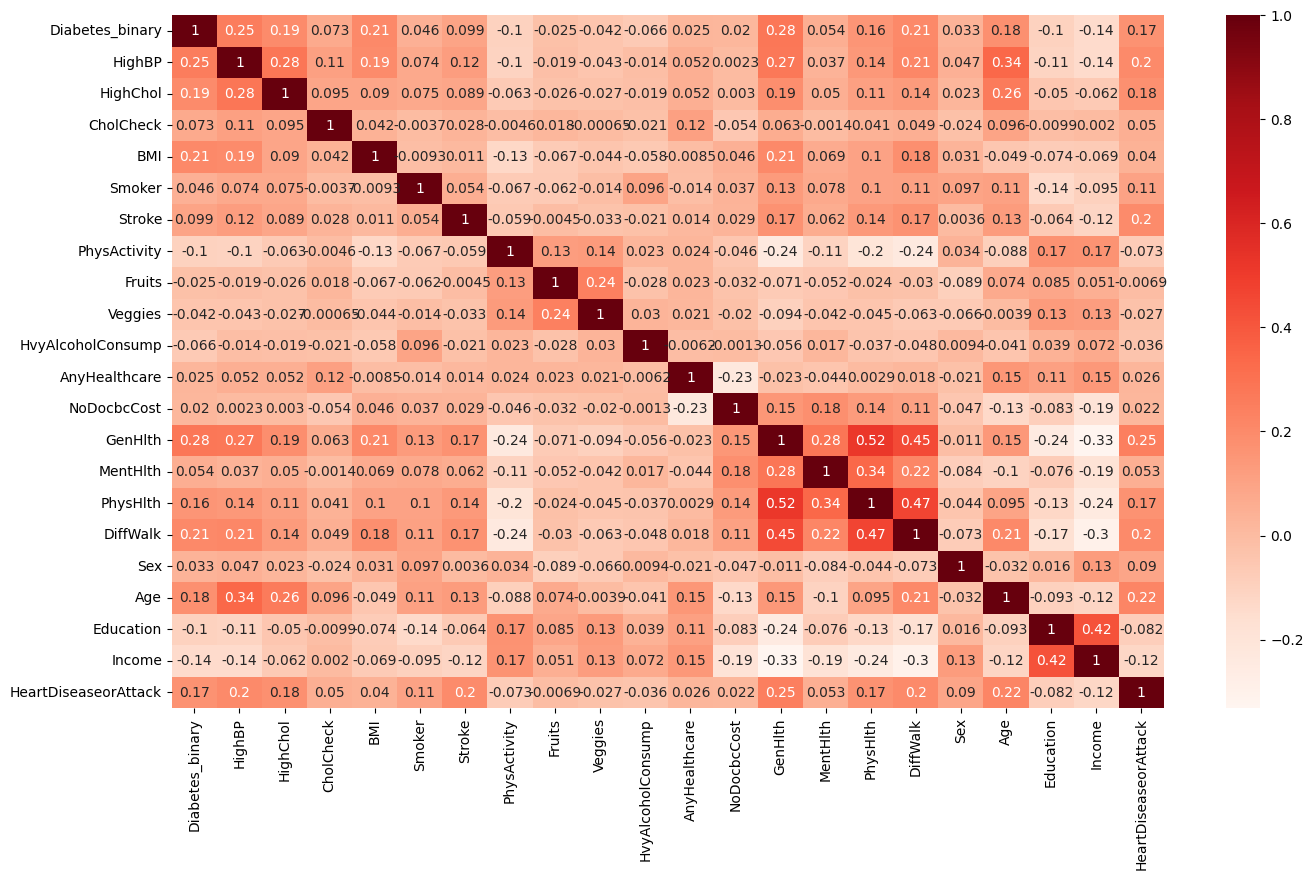

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(heart_df.corr(), annot=True, cmap='Reds');

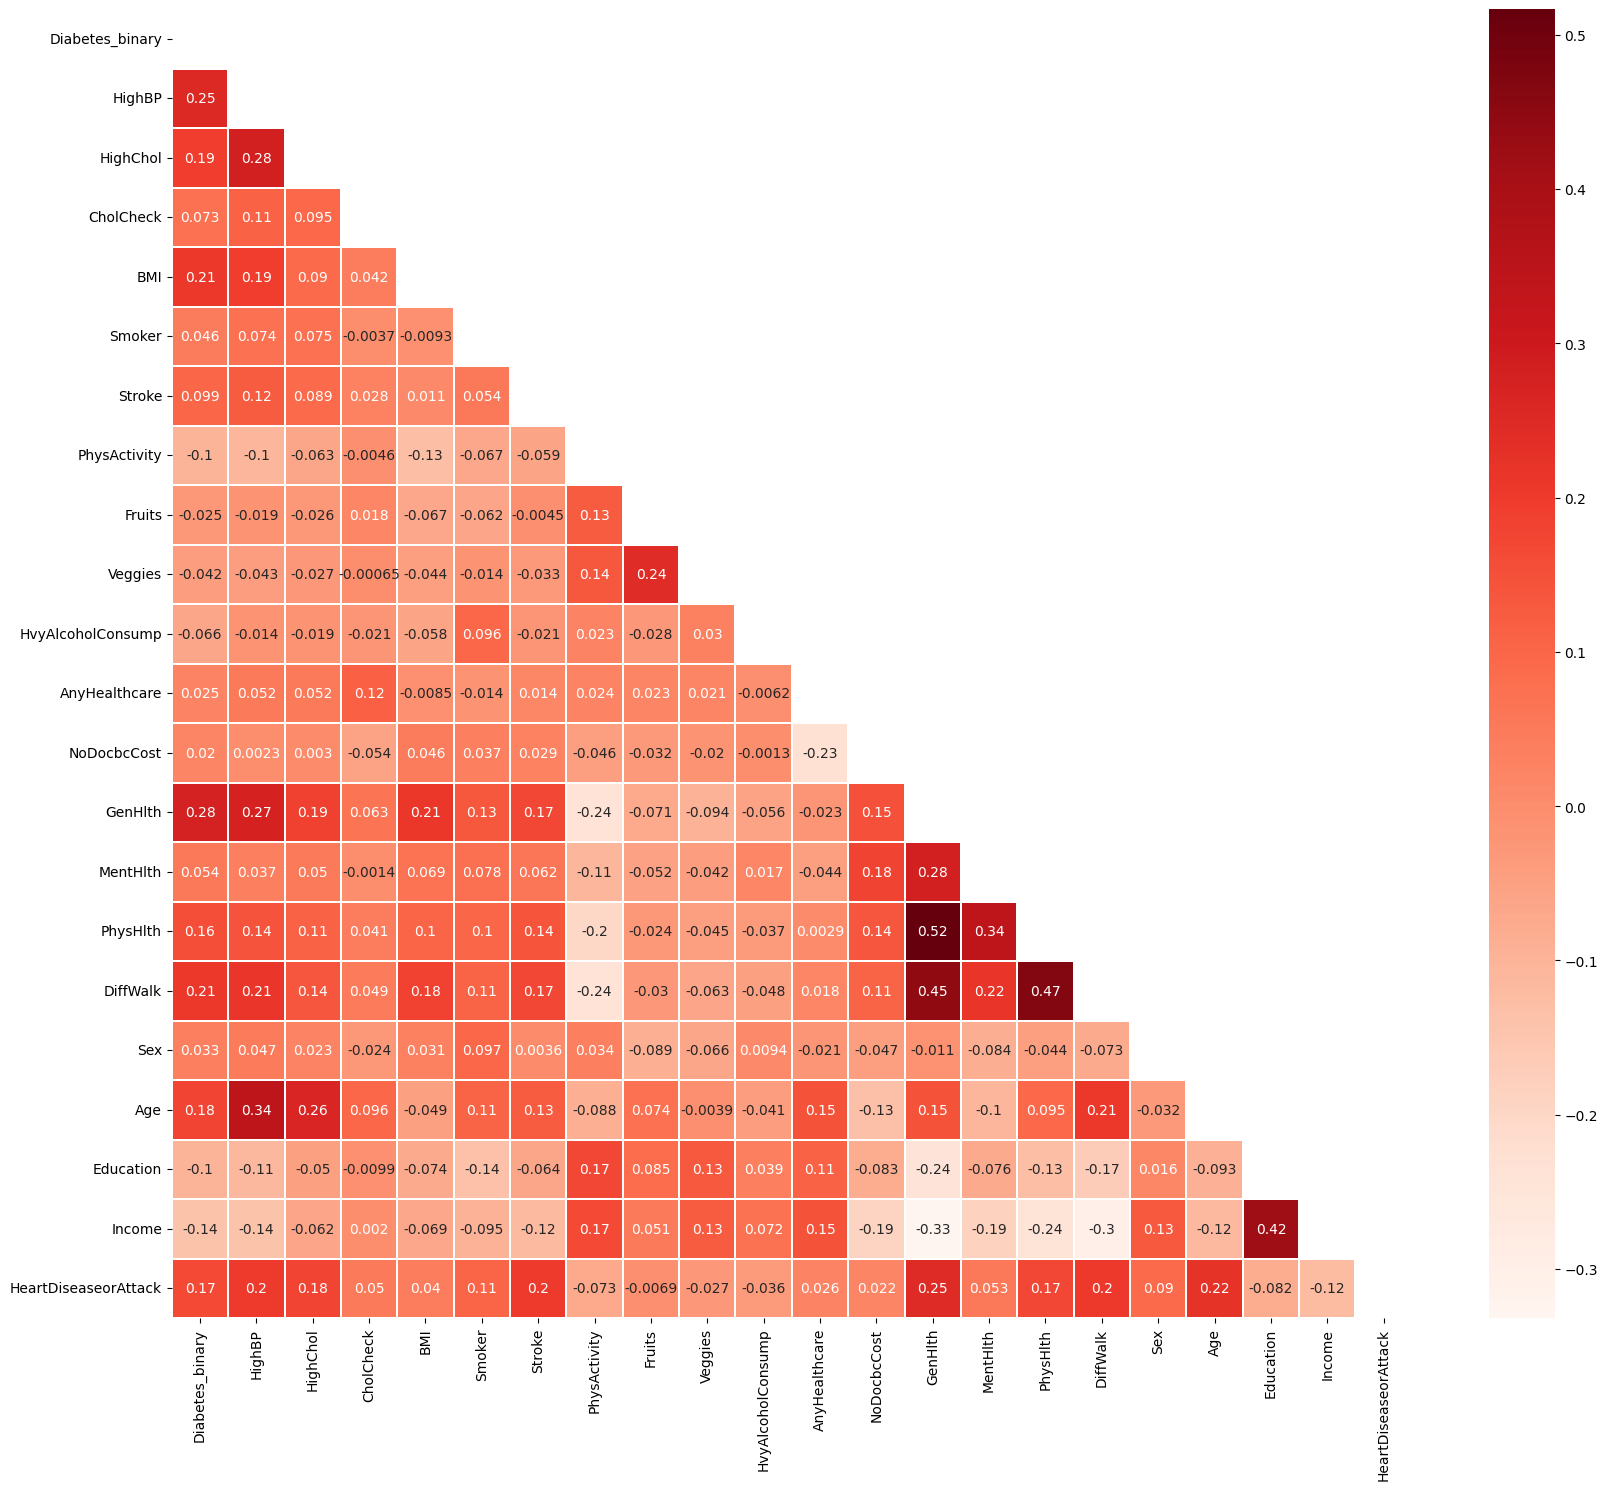

In [ ]:
plt.figure(figsize=(20, 17))
matrix = np.triu(heart_df.corr())
sns.heatmap(heart_df.corr(), annot=True, linewidth=.2, mask=matrix, cmap='Reds');

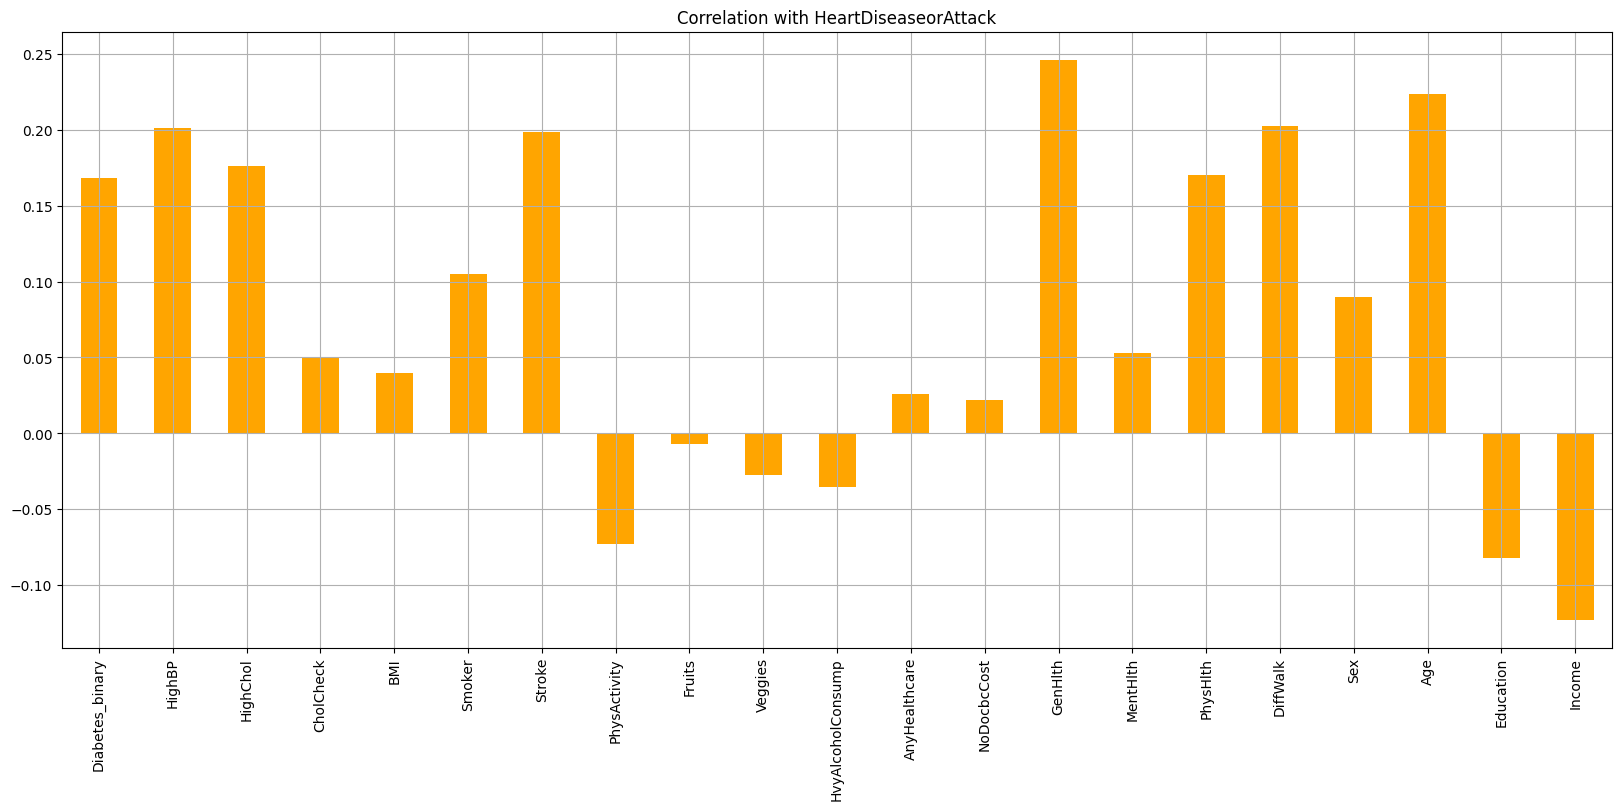

In [ ]:
heart_df.drop('HeartDiseaseorAttack', axis=1).corrwith(heart_df.HeartDiseaseorAttack).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with HeartDiseaseorAttack",color="Orange");

In [ ]:
hig_corr = heart_df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr['HeartDiseaseorAttack']) >= 0.2]
hig_corr_features

Index(['HighBP', 'GenHlth', 'DiffWalk', 'Age', 'HeartDiseaseorAttack'], dtype='object')

**Feature Importance using XGBoost**

In [ ]:
# Create X and Y dfs
X_df = heart_df.drop(['HeartDiseaseorAttack'], axis=1)
Y_df = heart_df['HeartDiseaseorAttack']

# Define the model
model = XGBClassifier()

# Fit the model
model.fit(X_df, Y_df)

# Get importance
feature_importance = model.feature_importances_

# Calculate feature importances percentages
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Sort in ascending order
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

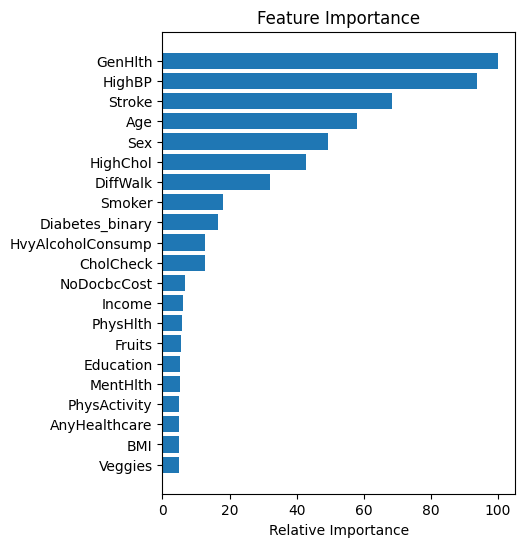

In [ ]:
# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

**Create a new df with the most important features for Heart Health prediction**

In [ ]:
hh_df = heart_df[['GenHlth', 'HighBP', 'HighChol', 'Age', 'Stroke', 'Diabetes_binary', 'PhysHlth', 'DiffWalk', 'HeartDiseaseorAttack']]
hh_df

,GenHlth,HighBP,HighChol,Age,Stroke,Diabetes_binary,PhysHlth,DiffWalk,HeartDiseaseorAttack
0,5.0,1.0,1.0,9.0,0.0,0.0,15.0,1.0,0.0
1,3.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
2,5.0,1.0,1.0,9.0,0.0,0.0,30.0,1.0,0.0
3,2.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
253675,3.0,1.0,1.0,5.0,0.0,0.0,5.0,0.0,0.0
253676,4.0,1.0,1.0,11.0,0.0,1.0,0.0,1.0,0.0
253677,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
253678,3.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0


###**Visualize the features of the new df**

**Histograms**

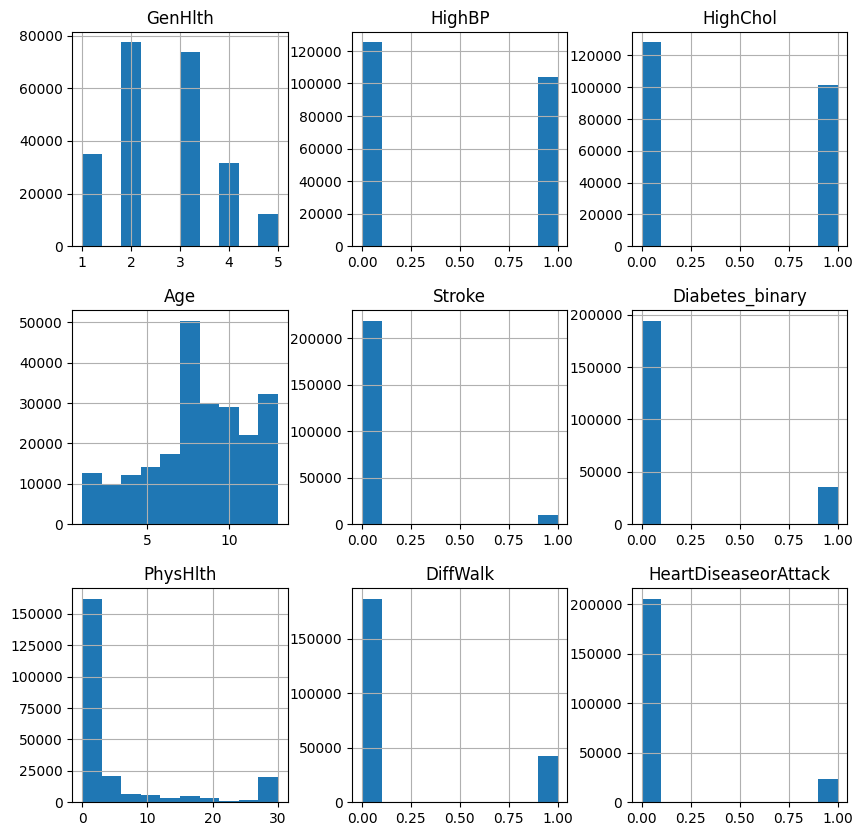

In [ ]:
hh_df.hist(figsize = (10,10))
plt.show()

**Pairplot of features**

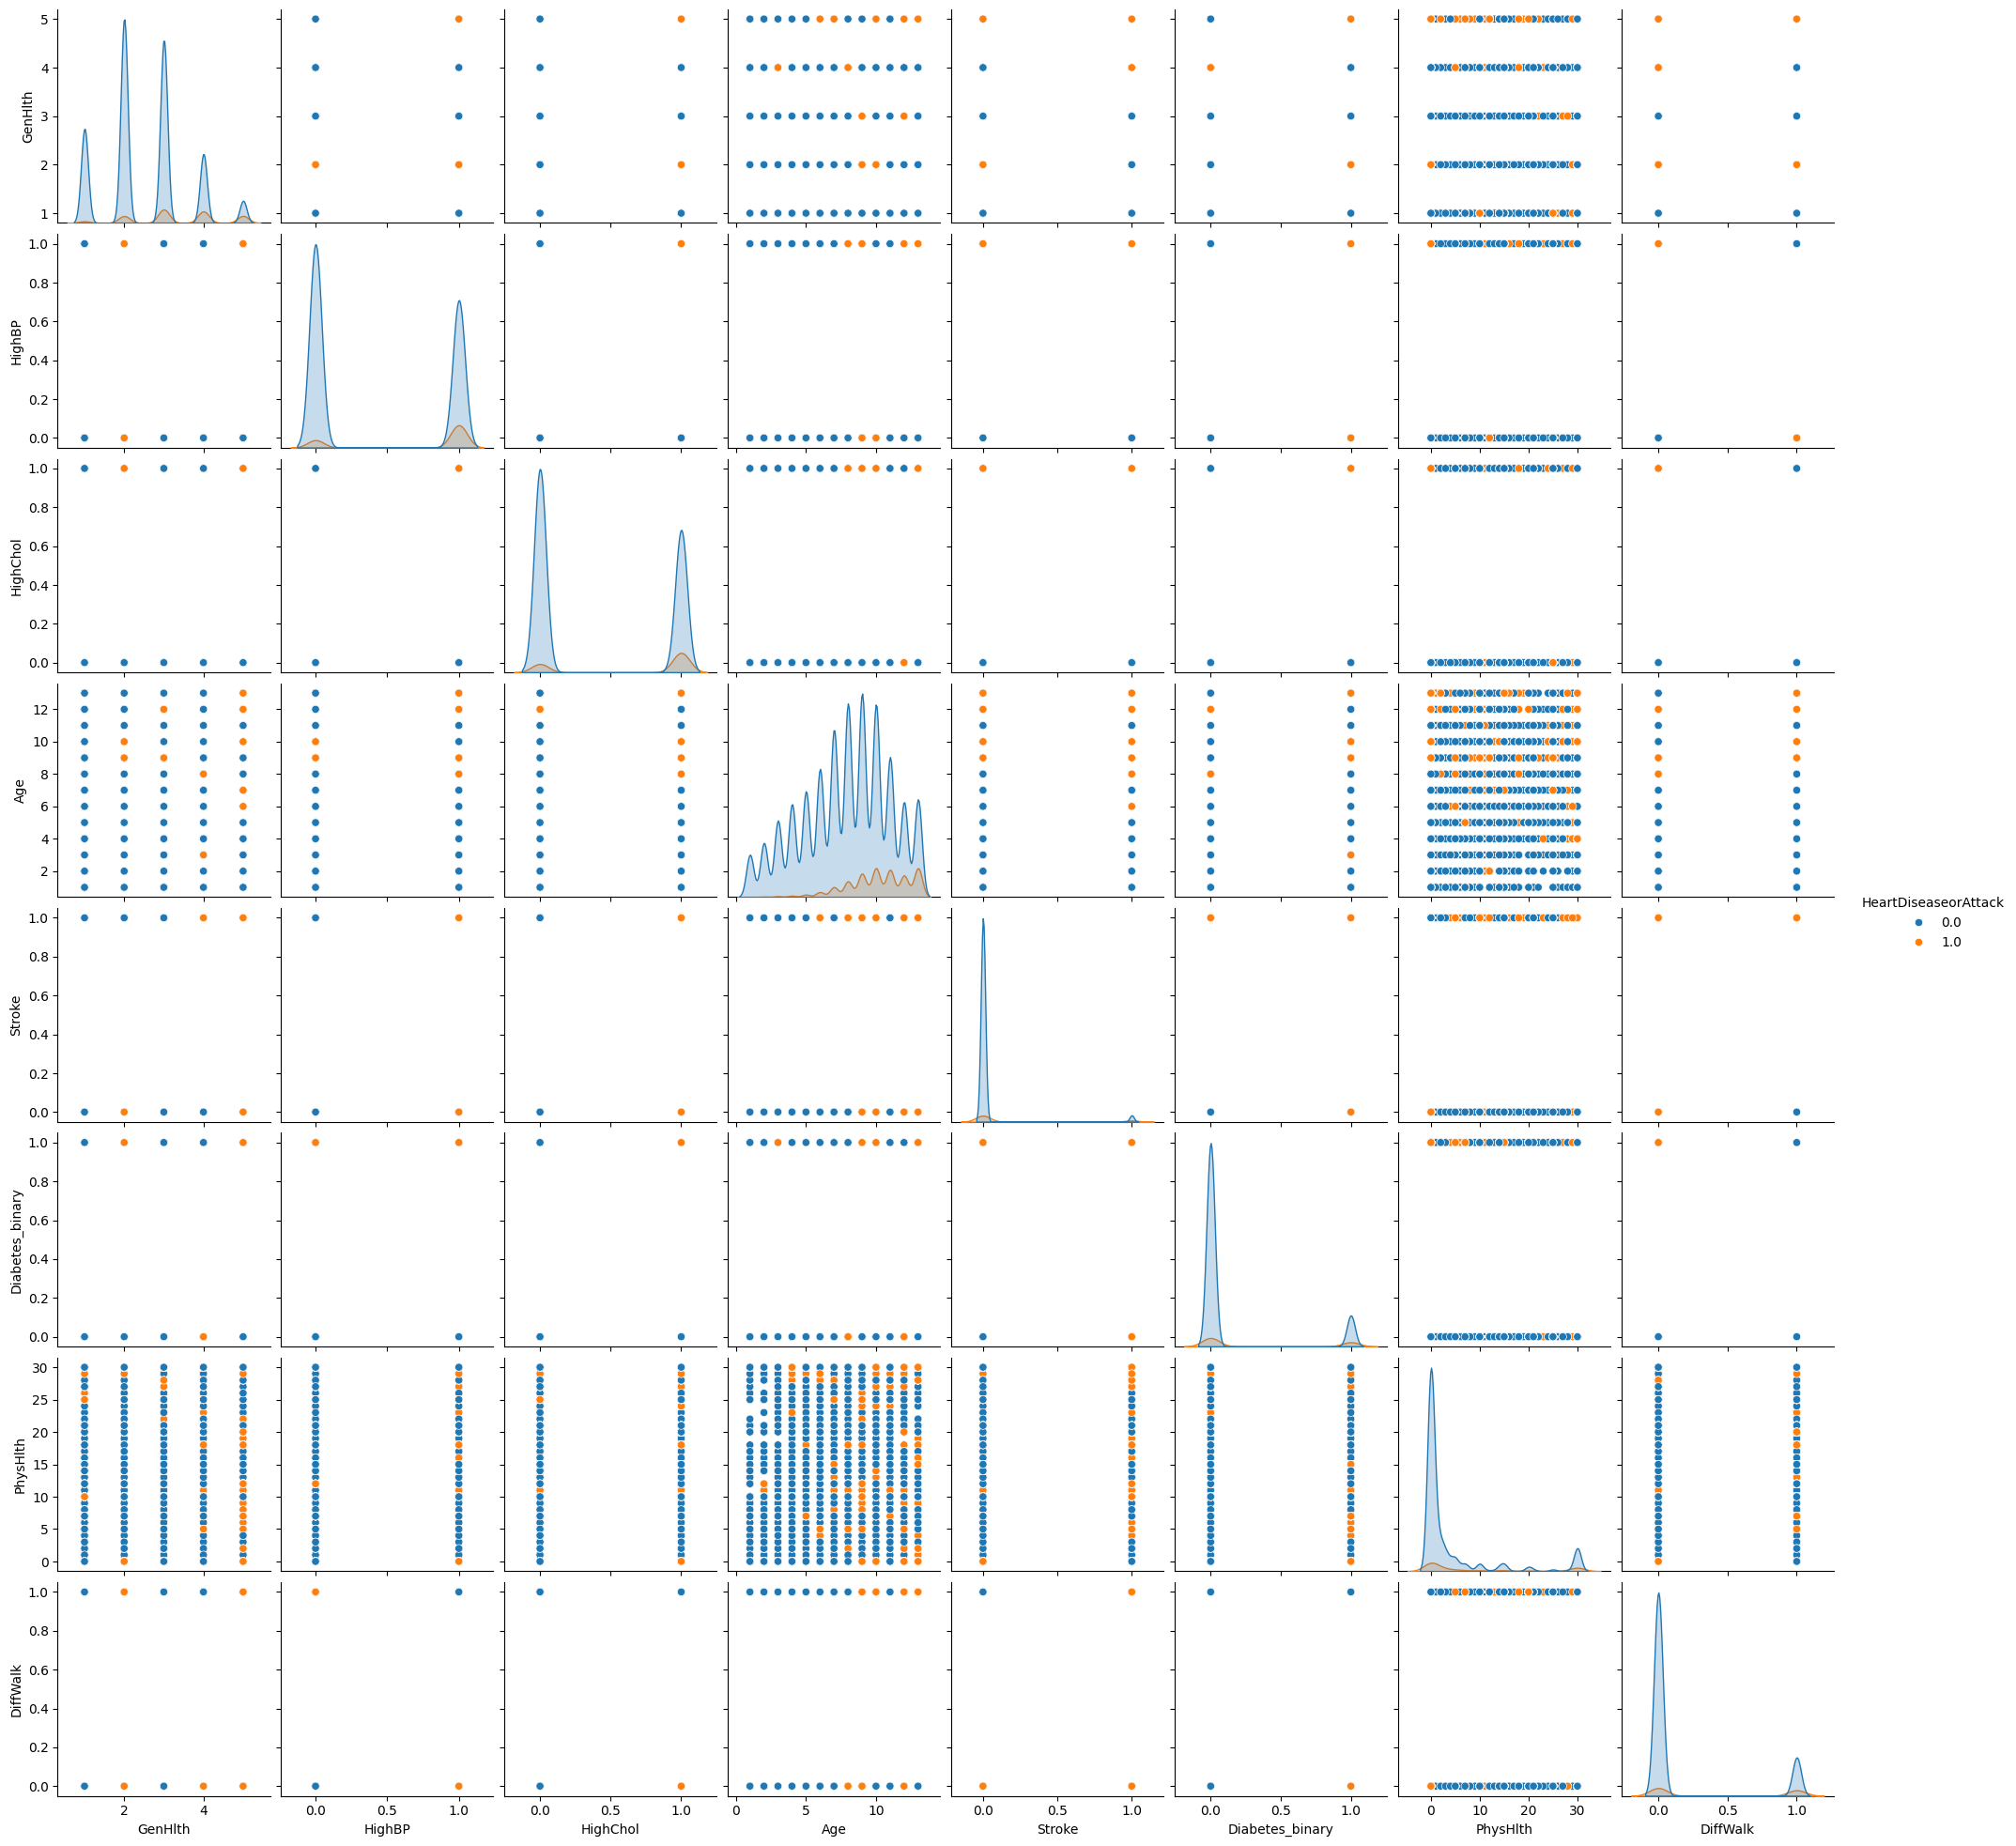

In [ ]:
sns.pairplot(data = hh_df, hue = 'HeartDiseaseorAttack' )
plt.show()

**Standard Deviation**

In [ ]:
hh_df.var()

GenHlth                  1.134144
HighBP                   0.247917
HighChol                 0.246595
Age                      9.575629
Stroke                   0.042807
Diabetes_binary          0.129554
PhysHlth                81.918380
DiffWalk                 0.151248
HeartDiseaseorAttack     0.092658
dtype: float64

## **Data Preprocessing**

In [ ]:
hh_df.columns

Index(['GenHlth', 'HighBP', 'HighChol', 'Age', 'Stroke', 'Diabetes_binary',
       'PhysHlth', 'DiffWalk', 'HeartDiseaseorAttack'],
      dtype='object')

**Dealing with Outliers using Z-score Method**

In [ ]:
# Function to remove outliers using Z-score
def remove_outliers_zscore(df, column):
    z_scores = np.abs(stats.zscore(df[column]))
    return df[(z_scores < 3)]

In [ ]:
numeric_columns = ['GenHlth', 'Age', 'PhysHlth']

# Removing outliers
clean_hh_df = hh_df.copy()
for column in numeric_columns:
    clean_hh_df = remove_outliers_zscore(clean_hh_df, column)

In [ ]:
hh_df.shape

(229474, 9)

In [ ]:
clean_hh_df.shape

(229474, 9)

*No outliers detected*

**Dealing with Class Imbalance**

HeartDiseaseorAttack
0.0    205761
1.0     23713
Name: count, dtype: int64


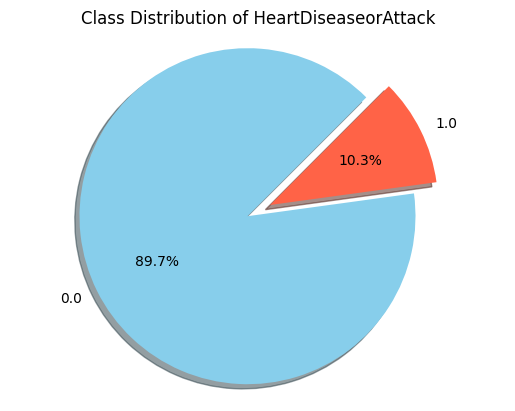

In [ ]:
# Check the distribution of target column
target_distribution = hh_df['HeartDiseaseorAttack'].value_counts()
print(target_distribution)

# Create a pie plot
fig1, ax1 = plt.subplots()
ax1.pie(target_distribution, explode=(0, 0.15), labels=target_distribution.index, autopct='%1.1f%%', shadow=True, startangle=45, colors=['skyblue', 'tomato'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Class Distribution of HeartDiseaseorAttack')
plt.show()

In [ ]:
# Fix class imbalance with Undersampling

# Separate target column
X = hh_df.drop(columns=['HeartDiseaseorAttack'])
y = hh_df['HeartDiseaseorAttack']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=33)

# Perform undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert the undersampled data back to a DataFrame if needed
balanced_hh_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_hh_df['HeartDiseaseorAttack'] = y_resampled

# Check the class distribution after undersampling
print(balanced_hh_df['HeartDiseaseorAttack'].value_counts())
print('Shape of balanced_hh_df:', balanced_hh_df.shape)

HeartDiseaseorAttack
0.0    23713
1.0    23713
Name: count, dtype: int64
Shape of balanced_hh_df: (47426, 9)


In [ ]:
# Save the dataframe to csv
balanced_hh_df.to_csv('heart_desease_df.csv', index=False)

## **Test Machine Learning Models**

In [ ]:
def test_ml_model(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    f1 = f1_score(targets, preds, average='binary')

    print("{} Accuracy: {:.2f}%".format(name, accuracy * 100))
    print("{} F1-Score: {:.2f}%".format(name, f1))

    return preds

In [ ]:
# Dictionary of ML models to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Extreme Gradient Boost': XGBClassifier(),
    'K-Nearest Neighbour': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

In [ ]:
# Split the data into training and testing sets
X = balanced_hh_df.drop(columns='HeartDiseaseorAttack')
y = balanced_hh_df['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Test each model
print('############################')
for model_name, model in models.items():
  # Fit model
  model = model.fit(X_train, y_train)

  print('- ', model_name, ' :')
  print('----------------------------')

  # Predict and plot on the training data
  train_preds = test_ml_model(model, X_train, y_train, 'Train')

  # Predict and plot on the validation data
  val_preds = test_ml_model(model, X_test, y_test, 'Validation')
  print('############################')

############################
-  Logistic Regression  :
----------------------------
Train Accuracy: 74.25%
Train F1-Score: 0.75%
Validation Accuracy: 74.72%
Validation F1-Score: 0.75%
############################
-  Naive Bayes  :
----------------------------
Train Accuracy: 70.52%
Train F1-Score: 0.68%
Validation Accuracy: 70.54%
Validation F1-Score: 0.68%
############################
-  Random Forest  :
----------------------------
Train Accuracy: 79.29%
Train F1-Score: 0.80%
Validation Accuracy: 72.36%
Validation F1-Score: 0.73%
############################
-  Extreme Gradient Boost  :
----------------------------
Train Accuracy: 76.28%
Train F1-Score: 0.77%
Validation Accuracy: 74.52%
Validation F1-Score: 0.76%
############################
-  K-Nearest Neighbour  :
----------------------------
Train Accuracy: 74.87%
Train F1-Score: 0.75%
Validation Accuracy: 71.23%
Validation F1-Score: 0.72%
############################
-  Decision Tree  :
----------------------------
Train Accurac

## **Decision Tree Hyperparameter Tuning**

In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [ ]:
dt = DecisionTreeClassifier()

# 10-fold Cross-Validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(X_train, y_train)

# Evaluate the model
train_preds = best_dt.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

test_preds = best_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_accuracy:.2%}")
print(f"Validation Accuracy: {test_accuracy:.2%}")

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Train Accuracy: 75.10%
Validation Accuracy: 74.11%


### **Generate Fuzzy Rules using Decision Tree**

In [ ]:
# Export the Decision Tree as text
fuzzy_rules = export_text(best_dt, feature_names=list(X_train.columns))

# Count the number of rules
rules_list = fuzzy_rules.split('\n')
num_rules = sum([1 for rule in rules_list if 'class:' in rule])

print("Number of rules generated:", num_rules)

# print("Decision Tree Fuzzy Rules:")
# print(fuzzy_rules)

Number of rules generated: 561


In [ ]:
# Save file with fuzzy rules
with open('decision_tree_fuzzy_rules.txt', 'w') as f:
    f.write(fuzzy_rules)

print("Decision Tree rules saved to 'decision_tree_fuzzy_rules.txt'")

Decision Tree rules saved to 'decision_tree_fuzzy_rules.txt'
